# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


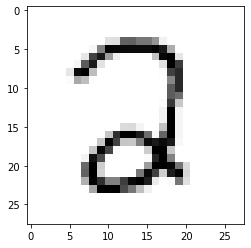

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.232
Training Accuracy: 0.7234, Testing Accuracy: 0.7324



Epoch 10, Loss 0.0902
Training Accuracy: 0.9106, Testing Accuracy: 0.9234



Epoch 20, Loss 0.057
Training Accuracy: 0.9394, Testing Accuracy: 0.9481



Epoch 30, Loss 0.045
Training Accuracy: 0.9501, Testing Accuracy: 0.9627



Epoch 40, Loss 0.039
Training Accuracy: 0.9548, Testing Accuracy: 0.9642



Epoch 50, Loss 0.0354
Training Accuracy: 0.9604, Testing Accuracy: 0.9688



Epoch 60, Loss 0.033
Training Accuracy: 0.9624, Testing Accuracy: 0.9688



Epoch 70, Loss 0.0311
Training Accuracy: 0.9636, Testing Accuracy: 0.9688



Epoch 80, Loss 0.0297
Training Accuracy: 0.9659, Testing Accuracy: 0.9688



Epoch 90, Loss 0.0285
Training Accuracy: 0.9673, Testing Accuracy: 0.9688



Epoch 100, Loss 0.0274
Training Accuracy: 0.9683, Testing Accuracy: 0.9698



Epoch 110, Loss 0.0266
Training Accuracy: 0.9688, Testing Accuracy: 0.9703



Epoch 120, Loss 0.0258
Training Accuracy: 0.9700, Testing Accuracy: 0.9713



Epoch 130, Loss 0.025
Training Accuracy: 0.9711, Testing Accuracy: 0.9708



Epoch 140, Loss 0.0244
Training Accuracy: 0.9718, Testing Accuracy: 0.9708



Epoch 150, Loss 0.0238
Training Accuracy: 0.9729, Testing Accuracy: 0.9713



Epoch 160, Loss 0.0232
Training Accuracy: 0.9732, Testing Accuracy: 0.9718



Epoch 170, Loss 0.0226
Training Accuracy: 0.9737, Testing Accuracy: 0.9718



Epoch 180, Loss 0.0221
Training Accuracy: 0.9744, Testing Accuracy: 0.9723



Epoch 190, Loss 0.0216
Training Accuracy: 0.9750, Testing Accuracy: 0.9728



Epoch 200, Loss 0.0212
Training Accuracy: 0.9753, Testing Accuracy: 0.9728



Epoch 210, Loss 0.0207
Training Accuracy: 0.9760, Testing Accuracy: 0.9733



Epoch 220, Loss 0.0203
Training Accuracy: 0.9770, Testing Accuracy: 0.9738



Epoch 230, Loss 0.0198
Training Accuracy: 0.9779, Testing Accuracy: 0.9748



Epoch 240, Loss 0.0194
Training Accuracy: 0.9784, Testing Accuracy: 0.9738



0.0022425832845064716

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2524
Training Accuracy: 0.6371, Testing Accuracy: 0.6497



Epoch 10, Loss 0.1077
Training Accuracy: 0.8969, Testing Accuracy: 0.9047



Epoch 20, Loss 0.0823
Training Accuracy: 0.9188, Testing Accuracy: 0.9299



Epoch 30, Loss 0.0705
Training Accuracy: 0.9306, Testing Accuracy: 0.9420



Epoch 40, Loss 0.0635
Training Accuracy: 0.9380, Testing Accuracy: 0.9481



Epoch 50, Loss 0.0587
Training Accuracy: 0.9416, Testing Accuracy: 0.9511



Epoch 60, Loss 0.0552
Training Accuracy: 0.9442, Testing Accuracy: 0.9561



Epoch 70, Loss 0.0524
Training Accuracy: 0.9472, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0503
Training Accuracy: 0.9479, Testing Accuracy: 0.9607



Epoch 90, Loss 0.0485
Training Accuracy: 0.9488, Testing Accuracy: 0.9607



Epoch 100, Loss 0.047
Training Accuracy: 0.9511, Testing Accuracy: 0.9612



Epoch 110, Loss 0.0457
Training Accuracy: 0.9518, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0446
Training Accuracy: 0.9534, Testing Accuracy: 0.9647



Epoch 130, Loss 0.0436
Training Accuracy: 0.9540, Testing Accuracy: 0.9652



Epoch 140, Loss 0.0427
Training Accuracy: 0.9547, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0419
Training Accuracy: 0.9553, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0412
Training Accuracy: 0.9561, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0406
Training Accuracy: 0.9569, Testing Accuracy: 0.9652



Epoch 180, Loss 0.04
Training Accuracy: 0.9576, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0394
Training Accuracy: 0.9578, Testing Accuracy: 0.9647



Epoch 200, Loss 0.0389
Training Accuracy: 0.9580, Testing Accuracy: 0.9642



Epoch 210, Loss 0.0385
Training Accuracy: 0.9585, Testing Accuracy: 0.9647



Epoch 220, Loss 0.038
Training Accuracy: 0.9592, Testing Accuracy: 0.9657



Epoch 230, Loss 0.0376
Training Accuracy: 0.9595, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0372
Training Accuracy: 0.9599, Testing Accuracy: 0.9657



0.026711155350325793

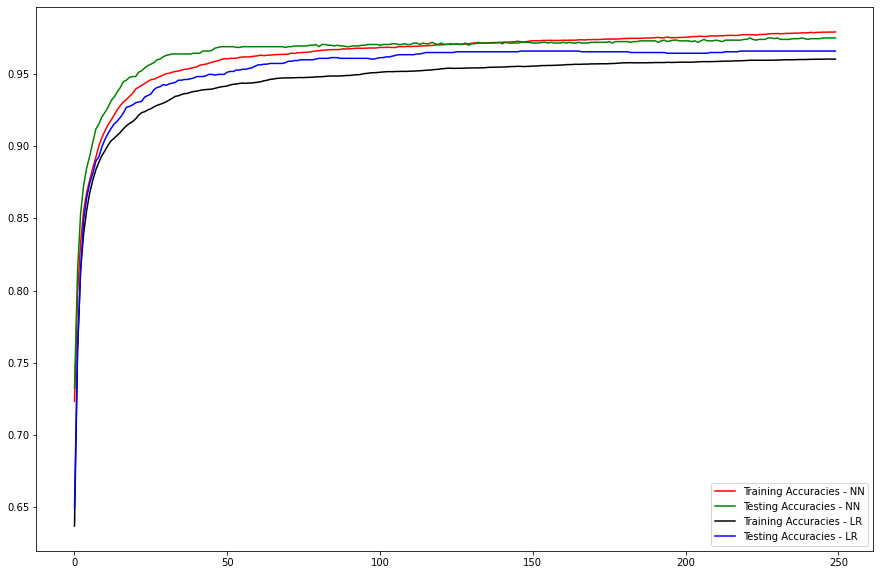

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

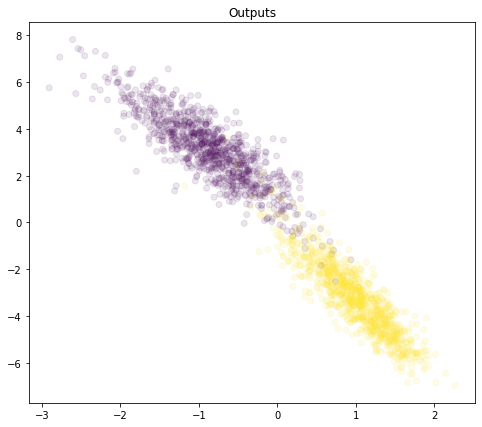

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

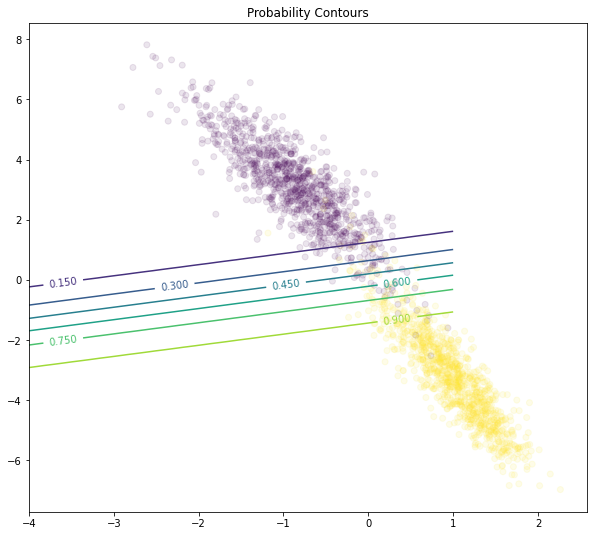

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );